In [6]:
from chomp_logic import *

board = BitBoard(size = (2, 2)).chomp((2, 2))
win_flag, checked_boards = board.is_winning()

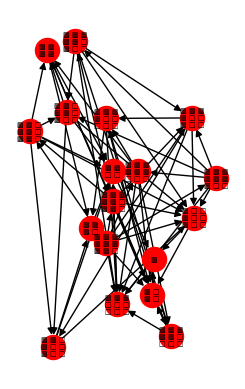

In [5]:
from chomp_logic import *
import networkx as nx
import matplotlib.pyplot as plt

checked_connections = {}
for board_key in [key for key in checked_boards.keys() if key != ""]:
    active_board = checked_boards[board_key]['board_state']
    sub_board_keys = [sub_board.hash_key() for sub_board in active_board.get_sub_boards() if sub_board.hash_key() != ""]
    checked_connections[board_key] = sub_board_keys

board_graph = nx.DiGraph()
    
for board_key in checked_connections.keys():
    if checked_boards[board_key]['win_flag']:
        board_graph.add_node(board_key, color = 'r', size = len(board_key))
    else:
        board_graph.add_node(board_key, color = 'b')
                                 
for node_key in checked_connections.keys():
    connection_keys = checked_connections[node_key]
    for connection_key in connection_keys:
        board_graph.add_edge(node_key, connection_key, label = connection_key)

subax1 = plt.subplot(121)
pos = nx.random_layout(board_graph)
nx.draw(board_graph, pos = pos, with_labels = True, node_color = 'r', font_size = 5)
plt.show()

In [39]:
# minimal_board = BitBoard(size = (1, 1))
# for path in nx.all_simple_paths(board_graph, board.hash_key(), minimal_board.hash_key()):
#     [checked_boards[node]['win_flag'] for node in path]
#         # print(path_node + '\n')

max_rows = 30
max_columns = 30
column_indices = list(range(max_columns)) * max_rows
row_indices = []
for i in range(max_rows):
    row_indices += [i] * max_columns

checked_boards = {}
for h, w in zip(row_indices, column_indices):
    board = BitBoard(size = (h, w)).chomp((2, 2)).chomp((1, 2))
    win_flag, checked_boards = board.is_winning(checked_boards)
    if win_flag == False:
        print(h, w, win_flag)

for move in board.moves():
    if board.chomp(move).is_winning(checked_boards)['win_flag'] == False:
        print(move)

# for neighbor in board_graph.neighbors(board.hash_key()):
#     print(neighbor + '\n')

▩ □ □
▩ □ □
▩ □ □

▩ ▩ □
▩ ▩ □
▩ ▩ □

▩ ▩ ▩
□ □ □
□ □ □

▩ ▩ ▩
▩ □ □
▩ □ □

▩ ▩ ▩
▩ ▩ □
▩ ▩ □

▩ ▩ ▩
▩ ▩ ▩
□ □ □

▩ ▩ ▩
▩ ▩ ▩
▩ □ □



In [80]:
shape = (5, 5)
board = np.ones(shape, dtype = bool)

def chomp(board, move):
    x_values = list(range(move[0], board.shape[0])) * board.shape[1]
    print(x_values)

def get_points_to_add(added_points):
    points_to_add = []
    for point in added_points:
        if point[0] - 1 >= 0:
            points_to_add.append((point[0] - 1, point[1]))
        if point[1] - 1 >= 0:
            points_to_add.append((point[0], point[1] - 1))
    points_to_add = list(set(points_to_add))
    return points_to_add

def get_board_masks(board):
    added_points = points = [(board.shape[0] - 1, board.shape[1] - 1)]
    while True:
        added_points = get_points_to_add(added_points)
        points += added_points
        if added_points == []:
            points = np.array(points).transpose()
            board_masks = [points[:, range(0, i)] for i in range(0, points.shape[1])]
            return board_masks

board_masks = get_board_masks(board)

boards = []
for mask in board_masks:
    new_board = board
    new_board[mask[0], mask[1]] = 0
    boards.append(new_board)




▩


▩ □
▩ □


▩ ▩
□ □


▩ □ □
▩ □ □
▩ □ □


▩ ▩ ▩
□ □ □
□ □ □


▩ ▩
▩ □


▩ ▩ □
▩ □ □
▩ □ □


▩ ▩ ▩
▩ □ □
□ □ □


▩ ▩
▩ ▩


▩ ▩ □
▩ ▩ □
▩ □ □


▩ ▩ ▩
▩ ▩ □
□ □ □


▩ ▩ □
▩ ▩ □
▩ ▩ □


▩ ▩ ▩
▩ ▩ ▩
□ □ □


▩ ▩ ▩
▩ □ □
▩ □ □


▩ ▩ ▩
▩ ▩ □
▩ □ □


▩ ▩ ▩
▩ ▩ □
▩ ▩ □


▩ ▩ ▩
▩ ▩ ▩
▩ □ □


▩ ▩ ▩
▩ ▩ ▩
▩ ▩ □


▩ ▩ ▩
▩ ▩ ▩
▩ ▩ ▩


▩ □ □ □
▩ □ □ □
▩ □ □ □
▩ □ □ □


▩ ▩ ▩ ▩
□ □ □ □
□ □ □ □
□ □ □ □


▩ □ □ □ □
▩ □ □ □ □
▩ □ □ □ □
▩ □ □ □ □
▩ □ □ □ □


▩ ▩ ▩ ▩ ▩
□ □ □ □ □
□ □ □ □ □
□ □ □ □ □
□ □ □ □ □


▩ ▩ □ □
▩ □ □ □
▩ □ □ □
▩ □ □ □


▩ ▩ ▩ ▩
▩ □ □ □
□ □ □ □
□ □ □ □


▩ ▩ □ □ □
▩ □ □ □ □
▩ □ □ □ □
▩ □ □ □ □
▩ □ □ □ □


▩ ▩ ▩ ▩ ▩
▩ □ □ □ □
□ □ □ □ □
□ □ □ □ □
□ □ □ □ □


▩ ▩ □ □
▩ ▩ □ □
▩ □ □ □
▩ □ □ □


▩ ▩ ▩ ▩
▩ ▩ □ □
□ □ □ □
□ □ □ □


▩ ▩ □ □ □
▩ ▩ □ □ □
▩ □ □ □ □
▩ □ □ □ □
▩ □ □ □ □


▩ ▩ ▩ ▩ ▩
▩ ▩ □ □ □
□ □ □ □ □
□ □ □ □ □
□ □ □ □ □


▩ ▩ □ □
▩ ▩ □ □
▩ ▩ □ □
▩ □ □ □


▩ ▩ ▩ ▩
▩ ▩ ▩ □
□ □ □ □
□ □ □ □


▩ ▩ □ □ □
▩ ▩ □ □ □
▩ ▩ □ □ □
▩ □ □ □ □
▩ □ □ □ □


▩ ▩ ▩ ▩ ▩
▩ ▩ ▩ □ □
□ □ □ □ □
□ □ □ □

In [41]:
def print_board(board):
    board_rep = board.astype(str)
    board_rep[board_rep == 'True'] = '\u25A9' # Replace all "True" values with a filled square
    board_rep[board_rep == 'False'] = '\u25A1' # Replace all "False" values with a empty square

    hash_key_array = [] # Store string as an array to speed up operations
    for i in range(board_rep.shape[0]):
        for j in range(board_rep.shape[1]):
            hash_key_array.append(board_rep[i, j])
            hash_key_array.append(' ')
        hash_key_array = hash_key_array[:-1] # Remove the extra space
        hash_key_array.append('\n')

    hash_key_array = hash_key_array[:-1] # Remove the extra newline character
    hash_key = ''.join(hash_key_array)
    print(hash_key + '\n')

def chomp(board, move, in_place = False):
    x_values = list(range(move[0], board.shape[0])) * (board.shape[1] - move[1])
    y_values = []
    for i in range(move[1], board.shape[1]):
        y_values += [i] * (board.shape[0] - move[0])
    
    if in_place == True:
        chomped_board = board
    else:
        chomped_board = board.copy()

    chomped_board[x_values, y_values] = 0
    return chomped_board

def generate_board_tree(board, board_tree: dict = {}):
    board_key = np.array2string(board)

    if board_tree.get(board_key) == None:
        board_tree[board_key] = {
            'board': board,
            'sub_boards': []
        }

        moves = np.array(np.where(board == True))
        for i in range(0, len(moves[0])):
            chomped_board = chomp(board, moves[:, i])
            chomped_board_key = np.array2string(chomped_board)
            board_tree[board_key]['sub_boards'].append(chomped_board)
            board_tree = generate_board_tree(chomped_board, board_tree)
    return board_tree

shape = (8, 8)
starting_board = np.ones(shape, dtype = bool)

board_tree = generate_board_tree(starting_board)
print(len(board_tree))

# for key in board_tree.keys():
#     print_board(board_tree[key]['board'])

12870


In [25]:
def print_board(board):
    board_rep = board.astype(str)
    board_rep[board_rep == 'True'] = '\u25A9' # Replace all "True" values with a filled square
    board_rep[board_rep == 'False'] = '\u25A1' # Replace all "False" values with a empty square

    hash_key_array = [] # Store string as an array to speed up operations
    for i in range(board_rep.shape[0]):
        for j in range(board_rep.shape[1]):
            hash_key_array.append(board_rep[i, j])
            hash_key_array.append(' ')
        hash_key_array = hash_key_array[:-1] # Remove the extra space
        hash_key_array.append('\n')

    hash_key_array = hash_key_array[:-1] # Remove the extra newline character
    hash_key = ''.join(hash_key_array)
    print(hash_key + '\n')

shape = (3, 3)
board = np.zeros(shape, dtype = bool)
board[0, 0] = 1

for i in range(0, board.shape[1]):
    new_board = board.copy()
    new_board[0:i+ 1, 0] = 1
    for j in range(0, board.shape[0]):
        #new_board = board.copy()
        new_board[0:i + 1, 0:j + 1] = 1
        for k in range(j, i):
            for l in range(k, board.shape[0]):
                new_board[k, l] = 1
                
                print_board(new_board)

▩ □ □
▩ □ □
□ □ □

▩ ▩ □
▩ □ □
□ □ □

▩ ▩ ▩
▩ □ □
□ □ □

▩ □ □
▩ □ □
▩ □ □

▩ ▩ □
▩ □ □
▩ □ □

▩ ▩ ▩
▩ □ □
▩ □ □

▩ ▩ ▩
▩ ▩ □
▩ □ □

▩ ▩ ▩
▩ ▩ ▩
▩ □ □

▩ ▩ ▩
▩ ▩ ▩
▩ ▩ □

▩ ▩ ▩
▩ ▩ ▩
▩ ▩ □



# Refactored board class

In [17]:
import numpy as np
import pprint

def get_boards(max_height: int, max_width: int, position: int = 0) -> list:
    checked_lists = []
    if position == max_width - 1:
        checked_lists = [[i] for i in range(0, max_height + 1)]
        return checked_lists
    for i in range(max_height + 1):
        sub_boards = get_boards(i, max_width, position + 1)
        for sub_board in sub_boards:
            checked_lists.append([i] + sub_board)
        
    return checked_lists

def chomp(board: list, move: tuple, in_place: bool = False):
    column, height = move
    new_board = board
    for i in range(column, len(board)):
        new_board[i] = min(new_board[i], height)
    if in_place == True:
        board = new_board
    return new_board

def string_rep(board):
    return ''.join([str(element) for element in board])

def moves(board):

def get_sub_boards(board):
    sub_boards = []
    for 
    return

def transpose(board):
    num_columns_transpose = max(board)
    transpose = [0] * num_columns_transpose
    for i in range(num_columns_transpose):
        transpose[i] = sum([element > i for element in board])
    return transpose

def is_winning(board: list, checked_boards: dict = {}):
    # BASE CASE: The empty board is considered player 1 winning
    if sum(board) == 0:
        checked_boards[string_rep(board)] = {'board_state': board, 'win_flag': True}
        return(True, checked_boards)
    # If board is in checked boards, return win_flag from that board
    elif checked_boards.get(string_rep(board)) != None:
        winning_flag = checked_boards[string_rep(board)]['win_flag']
        return winning_flag, checked_boards
    # If board is not in checked boards and is not empty, check if all sub-boards are losing and if so, this board is player 1 winning
    else:
        # Identify whether all sub-boards of a given board are player 1 winning/losing
        sub_board_results = [is_winning(sub_board, checked_boards)[0] for sub_board in get_sub_boards(board)]
        winning_flag = (sum(sub_board_results) == len(sub_board_results)) # If all sub-boards of board are LOSING then the board is winning
        checked_boards[string_rep(board)] = {'board_state': board, 'win_flag': winning_flag} # Add this board to the checked boards

        # If a board is player 1 winning/losing, then so is the transpose of that board, so add the transpose to the checked boards with the same winning_flag value
        board_transpose = transpose(board)
        if checked_boards.get(string_rep(board_transpose)) == None:
            checked_boards[string_rep(board_transpose)] = {'board_state': board_transpose, 'win_flag': winning_flag}
        return winning_flag, checked_boards

# max_height = 5
# max_width = 5
# boards = get_boards(max_height, max_width)

board = [4, 4, 4, 4]
print(chomp(board, (3, 2), in_place = True))
print(transpose(board))
print(is_winning(board))

[4, 4, 4, 2]
[4, 4, 3, 3]


TypeError: 'NoneType' object is not iterable